ChEn-3170: Computational Methods in Chemical Engineering Fall 2018 UMass Lowell; Prof. V. F. de Almeida **12Oct2018**

# 08. Least-Squares Reaction Rates
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents
* [Introduction](#intro)
* [Reaction mechanism](#rxnmech)
* [Full-Rank Reaction Sub-Mechanisms](#submech)
* [Full-Rank Least-Squares Reaction Rates](#lsr)
* [Residuals of All Sub-Mechanisms](#residuals)
* [Rank-Deficient Least-Squares Reaction Rate Solution](#rankdef)
---

## Introduction<a id="intro"></a>
This topic is an application of the least-squares method for calculating reaction rates.
The relation between the reaction rates vector, $\rvec$, and the species production rates vector, $\gvec$, is given by $\transpose{\Smtrx}\,\rvec = \gvec$. Since this is often a rectangular system, it remains the problem of finding one of the infinite number of solutions when $\Smtrx$ is full rank. Specifically if $\Smtrx$ is $m \times n$ with $m$ reactions and $n$ species, then $\Smtrx^\top$ is $n\times m$, that is,
$\Smtrx^\top = 
\begin{pmatrix}
S^\top _{1,1} & S^\top _{1,2} & \dots  & S^\top _{1,m} \\
S^\top _{2,1} & S^\top _{2,2} & \dots  & S^\top _{2,m} \\
\vdots  & \vdots  & \ddots & \vdots \\
S^\top _{n,1} & S^\top _{n,2} & \dots  & S^\top _{n,m}
\end{pmatrix} 
$
where $S^\top_{i,j} = S_{j,i}$. The reaction rates and species production rates are related by the matrix
product
$
\begin{pmatrix}
S^\top _{1,1} & S^\top _{1,2} & \dots  & S^\top _{1,m} \\
S^\top _{2,1} & S^\top _{2,2} & \dots  & S^\top _{2,m} \\
\vdots  & \vdots  & \ddots & \vdots \\
S^\top _{n,1} & S^\top _{n,2} & \dots  & S^\top _{n,m}
\end{pmatrix} 
\,
\begin{pmatrix}
r_1 \\ 
r_2 \\ 
\vdots  \\ 
r_m \\ 
\end{pmatrix}
=
\begin{pmatrix}
g_1 \\ 
g_2 \\ 
\vdots  \\ 
g_n \\ 
\end{pmatrix}
$
which shows that each species production rate has a contribution of every reaction:

\begin{equation*}
g_j = \sum\limits_{i=1}^m S^\top _{j,i}\, r_i \qquad\  \forall \qquad\  j=1,\ldots, n.
\end{equation*}

Refer to the classroom [notes](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/Evb2l8y2WNJCgNvJhcF0Pc4B-_TOOflJkiEAgCfICZwNVA?e=sV9YK0) on computational stoichiometry including an introduction to the linear, full-rank, least-squares method. To compute the reaction rates vector $\rvec$ for a given species production vector $\gvec$ we need to solve:

\begin{equation*}
\Smtrx^\top\,\rvec = \gvec .
\end{equation*}

There exists a unique least-squares solution $\rvec_\text{LS}$ to this problem if $\Smtrx$ is full rank, that is,

\begin{equation*}
 \min\limits_{\rvec}{\norm{\gvec - \Smtrx^\top\,\rvec_\text{LS}}} \quad\  \forall \quad\ \rvec.
\end{equation*}

This solution is obtained by solving:

\begin{equation*}
\Smtrx\,\Smtrx^\top\,\rvec_\text{LS}  = \Smtrx\,\gvec .
\end{equation*}

However $\Smtrx$ is often rank deficient which makes $\Smtrx\,\Smtrx^\top$ singular. The full-rank linear least-squares method breaks down in this case. However progress can be made as follows. 

One way to circumvent the rank-deficiency problem for relatively small system of reactions is to perform a full-rank reaction sub-mechanism analysis and select the most *significant* full-rank sub-mechanisms
(refer to Notebook 07). Let us call one of the top sub-mechanisms' full-rank matrix, $\Smtrx_1$, and its associated least-squares reaction rate the solution of

\begin{equation*}
\Smtrx_1\,\Smtrx_1^\top\,\rvec_1  = \Smtrx_1\,\gvec .
\end{equation*}

Note that $\rvec_1$ does not involve all reaction rates since $\Smtrx_1$ is full rank and $\Smtrx$ is not. Hence only the principal reactions of the original system is accounted for in the sub-mechanism with index $1$. The objective of this lecture is to compute $\rvec_1$. The least-squares problem is just a $\Amtrx\,\xvec=\bvec$ with
$\Amtrx = \Smtrx\,\Smtrx^\top$ and $\bvec = \Smtrx\,\gvec$.

## Reaction mechanism<a id="rxnmech"></a>
Refer to course Notebook 07.

In [1]:
'''Read a reaction mechanism and create data structures'''

# build the stoichiometric matrix
from chen_3170.toolkit import reaction_mechanism
#(species, reactions, stoic_mtrx) = reaction_mechanism('data/ammonia-rxn.txt')
(species, reactions, stoic_mtrx) = reaction_mechanism('data/methane-rxn.txt')

print(species)
from chen_3170.help import print_reactions
print_reactions(reactions)

['CO2', 'CH4', 'H2O', 'CO', 'H2', 'O2']
r0 :  CO+0.5 O2<=>1 CO2
r1 :  H2+0.5 O2<=>H2O
r2 :  CH4+2 O2<=>CO2+2 H2O
r3 :  CH4+1.5 O2<=>CO+2 H2O
n_reactions = 4


matrix shape = (4, 6)


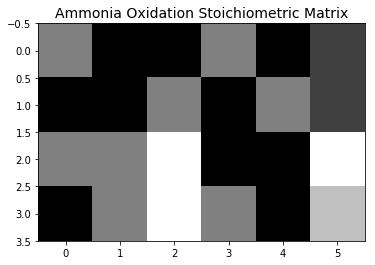

stoic_mtrx=
 [[ 1.   0.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.  -0.5]
 [ 1.  -1.   2.   0.   0.  -2. ]
 [ 0.  -1.   2.   1.   0.  -1.5]]


In [26]:
'''Check the stoichiometric matrix'''

from chen_3170.help import plot_matrix

plot_matrix(stoic_mtrx, title='Ammonia Oxidation Stoichiometric Matrix')
print('stoic_mtrx=\n',stoic_mtrx)

## Full-rank, reaction sub-mechanisms<a id="submech"></a>
Refer to course Notebook 07.

In [3]:
'''Build the full-rank sub-mechanism reactions list'''

from chen_3170.toolkit import sub_mechanisms

sub_mechanisms = sub_mechanisms( species, reactions, stoic_mtrx )

rank =  3
# of all possible sub_mechanisms = 4.0
# of full-rank sub_mechanisms = 3


In [4]:
'''Top reaction sub-mechanism'''

sub_mechanism_1 = sub_mechanisms[0]
print(sub_mechanism_1)

[(0, 1, 2), ['CO+0.5 O2<=>1 CO2', 'H2+0.5 O2<=>H2O', 'CH4+2 O2<=>CO2+2 H2O'], array([[ 1. ,  0. ,  0. , -1. ,  0. , -0.5],
       [ 0. ,  0. ,  1. ,  0. , -1. , -0.5],
       [ 1. , -1. ,  2. ,  0. ,  0. , -2. ]]), 10.0]


In [5]:
'''Top reaction sub-mechanism stoichiometric matrix'''

stoic_mtrx_1 = sub_mechanism_1[2]

#( dummy, dummy, stoic_mtrx_1 ) = reaction_mechanism( reactions = reactions_1 ) # taking advantage of this function

#plot_matrix(stoic_mtrx_1, title='Sub-Mech 1')
print('S_1=\n',stoic_mtrx_1)

S_1=
 [[ 1.   0.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.  -0.5]
 [ 1.  -1.   2.   0.   0.  -2. ]]


In [6]:
'''Another top reaction sub-mechanism'''

sub_mechanism_2 = sub_mechanisms[1]
print(sub_mechanism_2)

[(0, 1, 3), ['CO+0.5 O2<=>1 CO2', 'H2+0.5 O2<=>H2O', 'CH4+1.5 O2<=>CO+2 H2O'], array([[ 1. ,  0. ,  0. , -1. ,  0. , -0.5],
       [ 0. ,  0. ,  1. ,  0. , -1. , -0.5],
       [ 0. , -1. ,  2. ,  1. ,  0. , -1.5]]), 10.0]


In [7]:
'''Another top reaction sub-mechanism stoichiometric matrix'''

stoic_mtrx_2 = sub_mechanism_2[2]

#( dummy, dummy, stoic_mtrx_2 ) = reaction_mechanism( reactions = reactions_2 ) # taking advantage of this function

#plot_matrix(stoic_mtrx_1, title='Sub-Mech 2')
print('S_2=\n',stoic_mtrx_2)

S_2=
 [[ 1.   0.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.  -0.5]
 [ 0.  -1.   2.   1.   0.  -1.5]]


## Full-rank least-squares reaction rates<a id="lsr"></a>
Refer to course Notebook 07.

In [8]:
'''Assume a species production rate as random'''

import numpy as np
g_vec = np.random.random(len(species))

Here, let's compute $\rvec_1$ for 
$
\Smtrx_1\,\Smtrx_1^\top\,\rvec_1  = \Smtrx_1\,\gvec .
$

In [9]:
'''Compute the LS reaction rates for random species production rates'''

# build A x = b LS problem
a_mtrx = stoic_mtrx_1 @ stoic_mtrx_1.transpose()
b_vec  = stoic_mtrx_1 @ g_vec

# matrix LU factorization
from chen_3170.toolkit import lu_factorization
(P,L,U,s_rank) = lu_factorization( a_mtrx, 'partial' )
assert s_rank == np.linalg.matrix_rank(stoic_mtrx_1)

# triangular solve operations
from chen_3170.help import forward_solve
from chen_3170.toolkit import backward_solve
y_vec = forward_solve( L, P @ b_vec)
x_vec = backward_solve( U, y_vec)
assert np.linalg.norm(x_vec - np.linalg.solve(a_mtrx,b_vec)) < 1e-12

r_vec_1 = x_vec
print('reaction rates r_vec_1=',r_vec_1)
print('species production rates g_vec =',g_vec)
residual_vec_1 = g_vec - stoic_mtrx_1.transpose() @ r_vec_1
print('residual norm g - ST_1 r_1 = %8.5e'%np.linalg.norm(residual_vec_1))

reaction rates r_vec_1= [-0.32214406 -0.38662795  0.18098131]
species production rates g_vec = [0.08568061 0.16373267 0.6668898  0.23267751 0.76187317 0.62504322]
residual norm g - ST_1 r_1 = 1.09433e+00


In [10]:
'''Which reaction rates are these?'''

from chen_3170.help import print_reactions

print_reactions(sub_mechanism_1[1])
print(sub_mechanism_1[0])
print_reactions(reactions)

r0 :  CO+0.5 O2<=>1 CO2
r1 :  H2+0.5 O2<=>H2O
r2 :  CH4+2 O2<=>CO2+2 H2O
n_reactions = 3
(0, 1, 2)
r0 :  CO+0.5 O2<=>1 CO2
r1 :  H2+0.5 O2<=>H2O
r2 :  CH4+2 O2<=>CO2+2 H2O
r3 :  CH4+1.5 O2<=>CO+2 H2O
n_reactions = 4


Here, let's compute $\rvec_2$ for 
$
\Smtrx_2\,\Smtrx_2^\top\,\rvec_2  = \Smtrx_2\,\gvec .
$

In [11]:
'''Compute the LS reaction rates for random species production rates'''

# build A x = b LS problem
a_mtrx = stoic_mtrx_2 @ stoic_mtrx_2.transpose()
b_vec  = stoic_mtrx_2 @ g_vec

# matrix LU factorization
from chen_3170.toolkit import lu_factorization
(P,L,U,s_rank) = lu_factorization( a_mtrx, 'partial' )
assert s_rank == np.linalg.matrix_rank(stoic_mtrx_2)

# triangular solve operations
from chen_3170.help import forward_solve
from chen_3170.toolkit import backward_solve
y_vec = forward_solve( L, P @ b_vec)
x_vec = backward_solve( U, y_vec)
assert np.linalg.norm(x_vec - np.linalg.solve(a_mtrx,b_vec)) < 1e-12

r_vec_2 = x_vec
print('reaction rates r_vec_2=',r_vec_2)
print('species production rates g_vec =',g_vec)
residual_vec_2 = g_vec - stoic_mtrx_2.transpose() @ r_vec_2
print('residual norm g - ST_2 r_2 = %8.5e'%np.linalg.norm(residual_vec_2))

reaction rates r_vec_2= [-0.14116276 -0.38662795  0.18098131]
species production rates g_vec = [0.08568061 0.16373267 0.6668898  0.23267751 0.76187317 0.62504322]
residual norm g - ST_2 r_2 = 1.09433e+00


In [12]:
'''Which reaction rates are these?'''

from chen_3170.help import print_reactions

print_reactions(sub_mechanism_2[1])
print(sub_mechanism_2[0])
print_reactions(reactions)

r0 :  CO+0.5 O2<=>1 CO2
r1 :  H2+0.5 O2<=>H2O
r2 :  CH4+1.5 O2<=>CO+2 H2O
n_reactions = 3
(0, 1, 3)
r0 :  CO+0.5 O2<=>1 CO2
r1 :  H2+0.5 O2<=>H2O
r2 :  CH4+2 O2<=>CO2+2 H2O
r3 :  CH4+1.5 O2<=>CO+2 H2O
n_reactions = 4


Note that the sub-mechanisms rates $\rvec_1$ and $\rvec_2$ are different, but the corresponding residuals $\gvec - \Smtrx_1^\top\,\rvec_1$, and $\gvec - \Smtrx_2^\top\,\rvec_2$, are equal!

In [13]:
print('r_vec_1 - r_vec_2             =',r_vec_1 - r_vec_2)
np.set_printoptions(precision=3)
print('g - ST_1 r_1 - (g - ST_2 r_2) =',(g_vec-stoic_mtrx_1.transpose()@r_vec_1)-(g_vec-stoic_mtrx_2.transpose()@r_vec_2))

r_vec_1 - r_vec_2             = [-1.80981308e-01  1.11022302e-16 -2.77555756e-17]
g - ST_1 r_1 - (g - ST_2 r_2) = [ 0.000e+00 -5.551e-17 -1.110e-16  5.551e-17  1.110e-16  0.000e+00]


## Residuals of all sub-mechanisms<a id="residuals"></a>
Let us verify the previous residual result for all sub-mechanims. Here we will compute $\Smtrx_k$ for $k=1,\ldots,24$ and the corresponding LS reaction rates $\rvec_k$ and residuals


\begin{equation*}
\gvec - \Smtrx_k^\top\,\rvec_k .
\end{equation*}



In [14]:
sub_mech_rxn_rates_mtrx = np.zeros((s_rank,len(sub_mechanisms)))    # column-wise storage of all r_k's
sub_mech_residuals_mtrx = np.zeros((len(species),len(sub_mechanisms))) # column-wise storage of all g - ST_k r_k

for sub_mech in sub_mechanisms:
    
    stoic_mtrx_k = sub_mech[2]
  
    a_mtrx = stoic_mtrx_k @ stoic_mtrx_k.transpose()
    b_vec  = stoic_mtrx_k @ g_vec

    (P,L,U,s_rank) = lu_factorization( a_mtrx, 'partial' )
    assert s_rank == np.linalg.matrix_rank(stoic_mtrx_k)

    # triangular solve operations
    y_vec = forward_solve( L, P @ b_vec)
    x_vec = backward_solve( U, y_vec)
    assert np.linalg.norm(x_vec - np.linalg.solve(a_mtrx,b_vec)) < 1e-12
    
    r_vec = x_vec
    sub_mech_rxn_rates_mtrx[:,sub_mechanisms.index(sub_mech)] = r_vec
    
    print('rxns ids =',sub_mech[0])
    print('       r =', r_vec)
    
    rate_norm = np.linalg.norm(r_vec)
    print('   ||r|| =',rate_norm)
    
    residual = g_vec - stoic_mtrx_k.transpose() @ r_vec
    sub_mech_residuals_mtrx[:,sub_mechanisms.index(sub_mech)] = residual
    print('g - ST r     =',residual)
    print('||g - ST r|| =',np.linalg.norm(residual))
    print('')


rxns ids = (0, 1, 2)
       r = [-0.322 -0.387  0.181]
   ||r|| = 0.5348010876317981
g - ST r     = [ 0.227  0.345  0.692 -0.089  0.375  0.633]
||g - ST r|| = 1.0943286689913747

rxns ids = (0, 1, 3)
       r = [-0.141 -0.387  0.181]
   ||r|| = 0.449624653588766
g - ST r     = [ 0.227  0.345  0.692 -0.089  0.375  0.633]
||g - ST r|| = 1.0943286689913747

rxns ids = (1, 2, 3)
       r = [-0.387 -0.141  0.322]
   ||r|| = 0.5226709220432127
g - ST r     = [ 0.227  0.345  0.692 -0.089  0.375  0.633]
||g - ST r|| = 1.0943286689913747



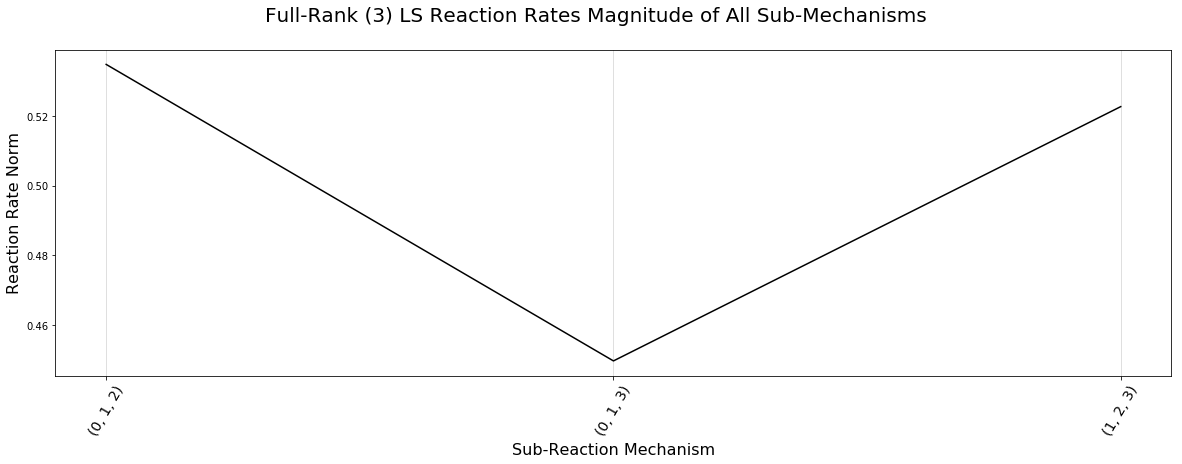

In [15]:
from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package

fig, ax = plt.subplots(figsize=(20,6))

ax.plot(range(sub_mech_rxn_rates_mtrx.shape[1]), np.linalg.norm(sub_mech_rxn_rates_mtrx,axis=0) ,color='black')

plt.xticks(range(sub_mech_rxn_rates_mtrx.shape[1]),[sm[0] for sm in sub_mechanisms],rotation=60,fontsize=14)
ax.set_ylabel('Reaction Rate Norm',fontsize=16)
ax.set_xlabel('Sub-Reaction Mechanism',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Full-Rank (%i) LS Reaction Rates Magnitude of All Sub-Mechanisms'%(s_rank),fontsize=20)
plt.show()

In [16]:
rate_min = np.linalg.norm(sub_mech_rxn_rates_mtrx,axis=0).min()
idx_min = np.argmin( np.linalg.norm(sub_mech_rxn_rates_mtrx,axis=0) )
print('sub-mechanism id.              = %i'%idx_min)
print('minimum norm sub-mech rxn rate = %8.4e'%rate_min)
print('sub-mechanism rxn id           =', sub_mechanisms[idx_min][0])
print_reactions(sub_mechanisms[idx_min][1])
print('sub-mechanism rxn score        = %4.2f'%sub_mechanisms[idx_min][3])

sub-mechanism id.              = 1
minimum norm sub-mech rxn rate = 4.4962e-01
sub-mechanism rxn id           = (0, 1, 3)
r0 :  CO+0.5 O2<=>1 CO2
r1 :  H2+0.5 O2<=>H2O
r2 :  CH4+1.5 O2<=>CO+2 H2O
n_reactions = 3
sub-mechanism rxn score        = 10.00


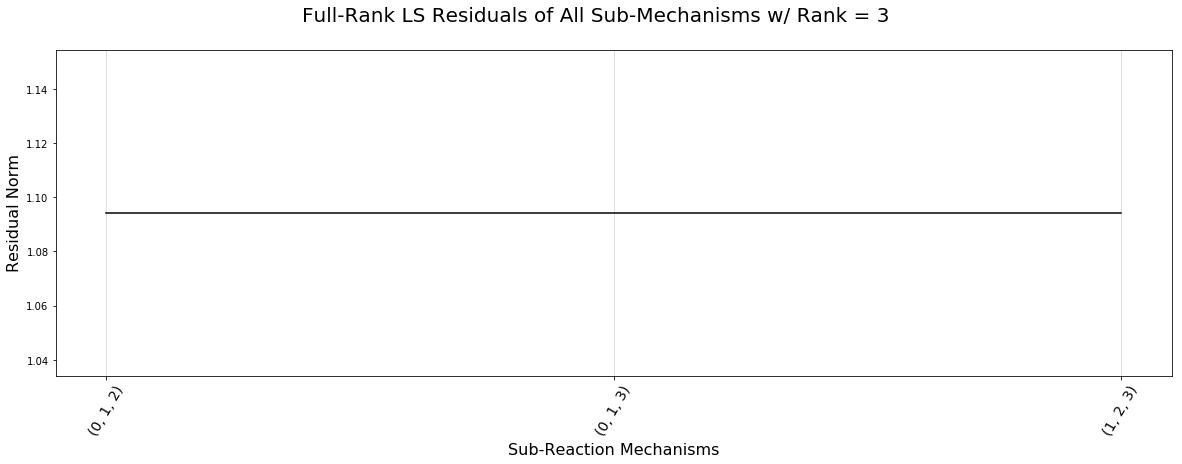

In [17]:
from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package

fig, ax = plt.subplots(figsize=(20,6))


ax.plot(range(sub_mech_residuals_mtrx.shape[1]), np.linalg.norm(sub_mech_residuals_mtrx,axis=0) ,color='black')

plt.xticks(range(sub_mech_residuals_mtrx.shape[1]),[smr[0] for smr in sub_mechanisms],rotation=60,fontsize=14)
ax.set_ylabel('Residual Norm',fontsize=16)
ax.set_xlabel('Sub-Reaction Mechanisms',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Full-Rank LS Residuals of All Sub-Mechanisms w/ Rank = '+str(s_rank),fontsize=20)
plt.show()

## Rank-deficient least-squares reaction rate solution<a id="rankdef"></a>
Despite all the foregoing development, we have not solved the original problem yet, namely

\begin{equation*}
\Smtrx^\top\,\rvec = \gvec .
\end{equation*}

However this problem is related to the series of sub-mechanisms we just analyzed. To see this, assemble the matrix of sub-mechanism reaction rates mapped into the original reaction dimension $m=7$ by completing the additional entries with zeros. We denote this vector mapping $\rvec_k\longrightarrow\hat{\rvec}_k$ and the vectors 
$\hat{\rvec}_k$ as *basic* vectors. Then we show that all basic vectors produce the same residual vectors, that is:

\begin{equation*}
\gvec - \Smtrx^\top\,\hat{\rvec}_k
\end{equation*}

is invariant for any $\hat{\rvec}_k$ and equal to the residuals $\gvec - \Smtrx_k^\top\,\rvec_k$. All residuals being equal, we choose the rank-deficient least-squares basic solution, the $\rvec_k$ of least norm.

In [18]:
'''Map r_k --> \hat{r} rates'''

mech_rxn_rates_mtrx = np.zeros((len(reactions),len(sub_mechanisms)))

for sm in sub_mechanisms:
    sm_idx = sub_mechanisms.index(sm)
    rxn_idxs = sm[0]
    mech_rxn_rates_mtrx[rxn_idxs,sm_idx] = sub_mech_rxn_rates_mtrx[:,sm_idx] # map 

matrix shape = (4, 3)


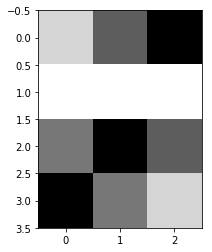

[[-0.32 -0.14  0.  ]
 [-0.39 -0.39 -0.39]
 [ 0.18  0.   -0.14]
 [ 0.    0.18  0.32]]


In [19]:
'''Show the mapping in the form of a matrix'''

from chen_3170.help import plot_matrix

plot_matrix(mech_rxn_rates_mtrx)
np.set_printoptions(precision=2)
print(mech_rxn_rates_mtrx)

Compute $\gvec - \Smtrx^\top\,\hat{\rvec}_k$ for all $k$.

In [20]:
'''Compute ST \hat{r}_k for all k'''

np.set_printoptions(precision=3,threshold=100,edgeitems=5)
print( stoic_mtrx.transpose() @ mech_rxn_rates_mtrx )

[[-0.141 -0.141 -0.141]
 [-0.181 -0.181 -0.181]
 [-0.025 -0.025 -0.025]
 [ 0.322  0.322  0.322]
 [ 0.387  0.387  0.387]
 [-0.008 -0.008 -0.008]]


Select for basic solution of the rank-deficient LS problem: 

\begin{equation*}
\min\limits_k \hat{\rvec}_k \quad\ \forall \quad\ k=1,\ldots,24.
\end{equation*}

In [21]:
'''Subtract above from g column by column'''

np.set_printoptions(precision=3)
for j in range(mech_rxn_rates_mtrx.shape[1]):
    tmp = g_vec - (stoic_mtrx.transpose() @ mech_rxn_rates_mtrx)[:,j]
    print('residual k = %i'%j,tmp)

residual k = 0 [ 0.227  0.345  0.692 -0.089  0.375  0.633]
residual k = 1 [ 0.227  0.345  0.692 -0.089  0.375  0.633]
residual k = 2 [ 0.227  0.345  0.692 -0.089  0.375  0.633]


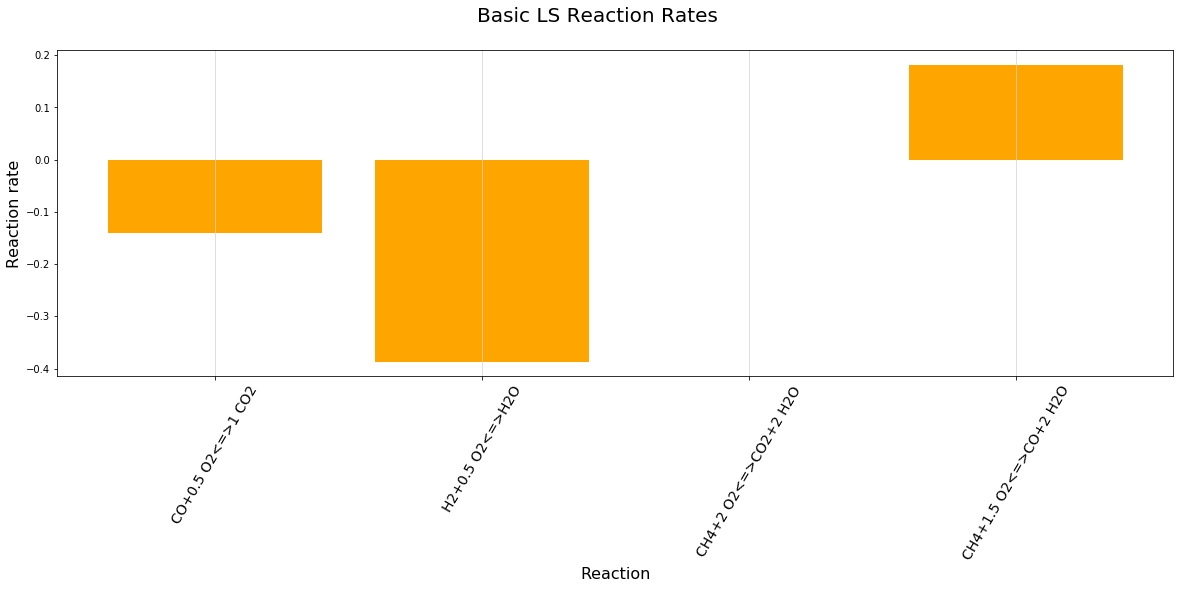

In [22]:
'''Basic least-squares reaction rates'''

fig, ax = plt.subplots(figsize=(20,6))
ax.bar(range(len(reactions)), mech_rxn_rates_mtrx[:,idx_min], color='orange')
plt.xticks(range(len(reactions)),reactions,rotation=60,fontsize=14)
ax.set_ylabel('Reaction rate',fontsize=16)
ax.set_xlabel('Reaction',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Basic LS Reaction Rates',fontsize=20)
plt.show()

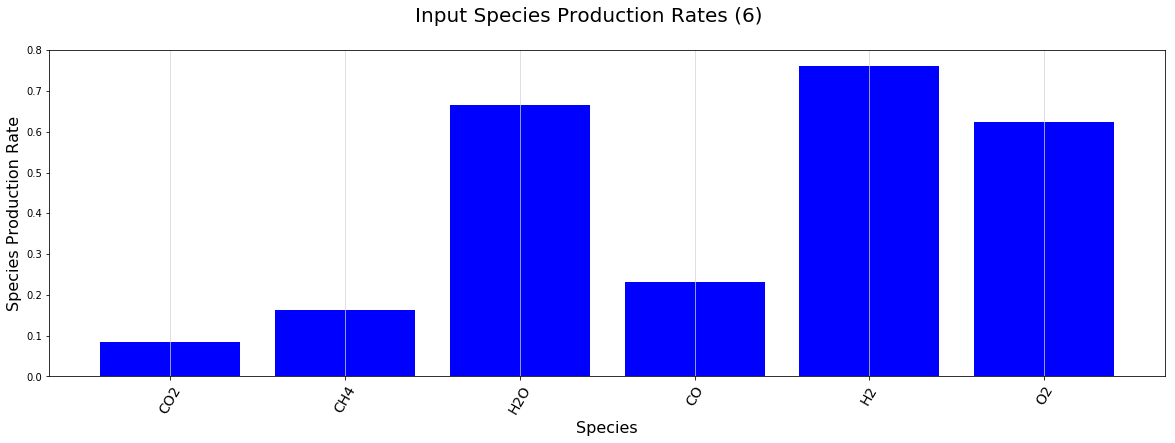

In [23]:
'''Plot of the input species production rate'''

fig, ax = plt.subplots(figsize=(20,6))
ax.bar(range(len(species)), g_vec, color='blue')
plt.xticks(range(len(species)),species,rotation=60,fontsize=14)
ax.set_ylabel('Species Production Rate',fontsize=16)
ax.set_xlabel('Species',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Input Species Production Rates ('+str(len(species))+')',fontsize=20)
plt.show()